# Dataset Exploration

### Load Data and Display First Values

In [1]:
import pandas as pd

data = pd.read_csv("../data/01_Original.csv")
data.head(3)

,hash,diff,message,author_email,author_name,committer_email,committer_name,project,split
0,1de640cc59b4b3030447d567b3c99c50777bd760,a/setup.py b/setup.py\nindex <HASH>..<HASH> 1...,setup: Detect if wheel and twine installed,gcushen@users.noreply.github.com,George Cushen,gcushen@users.noreply.github.com,George Cushen,gcushen_mezzanine-api,train
1,c1cce6fe5e49df5546c30a662fd141d41f4fc389,a/Builder.php b/Builder.php\nindex <HASH>..<H...,[Builder] Adding root page in any case,g.passault@gmail.com,Gregwar,g.passault@gmail.com,Gregwar,Gregwar_Slidey,train
2,2f7d97d15ea41f4112e74429617c5daad740d7cc,a/web.go b/web.go\nindex <HASH>..<HASH> 10064...,Added web.Urlencode method,hoisie@gmail.com,Michael Hoisie,hoisie@gmail.com,Michael Hoisie,hoisie_web,train


### Get First Overview on Data

In [2]:
data.describe()

,hash,diff,message,author_email,author_name,committer_email,committer_name,project,split
count,1665091,1665091,1665091,1664259,1664949,1664285,1664937,1665091,1665091
unique,1665091,1659398,1605673,219575,195197,169316,150739,71532,3
top,1de640cc59b4b3030447d567b3c99c50777bd760,a/tests/input/logictree_test.py b/tests/input...,Apply fixes from StyleCI (#<I>),michele.simionato@gmail.com,Michele Simionato,noreply@github.com,GitHub,saltstack_salt,train
freq,1,7,1307,4991,5077,96629,96659,17501,1165564


We see that there are 1.665.091 entries in our dataset.

There are 1.605.673 unique commit messages created by 169.316 different committers (counted by emails) of 71.532 different projects.

## Tokenize and Generate Vocabulary

### Standard NLTK-Tokenizer

Start with the standard nltk tokenizer and explore the vocabulary size without and with lowercasing every letter.

In [3]:
import nltk

# standard without lowercasing
data["std_tokenized_message"] = data['message'].apply(nltk.tokenize.word_tokenize)

std_tokenized_messages = []
std_tokenized_messages.extend(data["std_tokenized_message"].values)
std_tokenized_messages_flat = [item for sublist in std_tokenized_messages for item in sublist]
std_total_vocab = nltk.lm.Vocabulary(std_tokenized_messages_flat)

print("The vocabulary contains {std_vocab_count} tokens using the standard nltk tokenizer without removing stopwords.".format(std_vocab_count = len(std_total_vocab.counts)))

# standard with lowercasing
lower_std_tokenized_messages_flat = [item.lower() for sublist in std_tokenized_messages for item in sublist]
lower_std_total_vocab = nltk.lm.Vocabulary(lower_std_tokenized_messages_flat)

print("The lowercased vocabulary contains {lower_std_vocab_count} tokens using the standard nltk tokenizer without removing stopwords.".format(lower_std_vocab_count = len(lower_std_total_vocab.counts)))

The vocabulary contains 799001 tokens using the standard nltk tokenizer without removing stopwords.
The lowercased vocabulary contains 729164 tokens using the standard nltk tokenizer without removing stopwords.


Check whether the tokenizer is doing good.

In [4]:
for i in range(3):
    print(str(data['message'][i + 11]) + " --> " + str(std_tokenized_messages[i + 11]))
    print()

Handle asynchronous rendering in tests --> ['Handle', 'asynchronous', 'rendering', 'in', 'tests']

Remove the overriden "GuildImpl#getIconUrl()" implementation

The guild interface already has the proper implementation, we don't need the overriden method anymore. --> ['Remove', 'the', 'overriden', '``', 'GuildImpl', '#', 'getIconUrl', '(', ')', "''", 'implementation', 'The', 'guild', 'interface', 'already', 'has', 'the', 'proper', 'implementation', ',', 'we', 'do', "n't", 'need', 'the', 'overriden', 'method', 'anymore', '.']

DOC: Added DataFrame in Parameters & Return description in the docstring (#<I>)

* DOC: Added DataFrame in Parameters & Return description in the docstring



* DOC: Reduced number of characters in Line <I>



* DOC: removed trailing whitespaces



* DOC: Removed redundant text and fixed punctuation. --> ['DOC', ':', 'Added', 'DataFrame', 'in', 'Parameters', '&', 'Return', 'description', 'in', 'the', 'docstring', '(', '#', '<', 'I', '>', ')', '*', 'DOC', ':', 'Add

### Twitter Tokenizer from NLTK

Evaluate the twitter tokenizer and check if there is any difference.

In [5]:
# twitter without lowercasing
data["tweet_tokenized_message"] = data['message'].apply(nltk.tokenize.TweetTokenizer().tokenize)

tweet_tokenized_messages = []
tweet_tokenized_messages.extend(data["tweet_tokenized_message"].values)
tweet_tokenized_messages_flat = [item for sublist in tweet_tokenized_messages for item in sublist]
tweet_total_vocab = nltk.lm.Vocabulary(tweet_tokenized_messages_flat)
print("The vocabulary contains {tweet_vocab_count} tokens using the twitter tokenizer without removing stopwords.".format(tweet_vocab_count = len(tweet_total_vocab.counts)))

# twitter with lowercasing
lower_tweet_tokenized_messages_flat = [item.lower() for sublist in tweet_tokenized_messages for item in sublist]
lower_tweet_total_vocab = nltk.lm.Vocabulary(lower_tweet_tokenized_messages_flat)

print("The lowercased vocabulary contains {lower_tweet_vocab_count} tokens using the twitter tokenizer without removing stopwords.".format(lower_tweet_vocab_count = len(lower_tweet_total_vocab.counts)))

The vocabulary contains 716726 tokens using the twitter tokenizer without removing stopwords.
The lowercased vocabulary contains 647026 tokens using the twitter tokenizer without removing stopwords.


In [6]:
for i in range(3):
    print(str(data['message'][i + 11]) + " --> " + str(tweet_tokenized_messages[i + 11]))
    print()

Handle asynchronous rendering in tests --> ['Handle', 'asynchronous', 'rendering', 'in', 'tests']

Remove the overriden "GuildImpl#getIconUrl()" implementation

The guild interface already has the proper implementation, we don't need the overriden method anymore. --> ['Remove', 'the', 'overriden', '"', 'GuildImpl', '#getIconUrl', '(', ')', '"', 'implementation', 'The', 'guild', 'interface', 'already', 'has', 'the', 'proper', 'implementation', ',', 'we', "don't", 'need', 'the', 'overriden', 'method', 'anymore', '.']

DOC: Added DataFrame in Parameters & Return description in the docstring (#<I>)

* DOC: Added DataFrame in Parameters & Return description in the docstring



* DOC: Reduced number of characters in Line <I>



* DOC: removed trailing whitespaces



* DOC: Removed redundant text and fixed punctuation. --> ['DOC', ':', 'Added', 'DataFrame', 'in', 'Parameters', '&', 'Return', 'description', 'in', 'the', 'docstring', '(', '#', '<I>', ')', '*', 'DOC', ':', 'Added', 'DataFrame', 

The selection of the tokenizer influences vocabulary size and tokenization quality:

<u>Vocabulary Size</u>
|  | mixed | lowercased |
| --- | --- | --- |
| Standard NLTK | 799001 | 729164 |
| Twitter | 716726 | 647026 |

The split of the twitter tokenizer seems to be more reasonable because of the following two examples:

<u>Tokenization Examples</u>
| Text | Standard Tokenizer | Twitter Tokenizer |
| --- | --- | --- |
| "GuildImpl#getIconUrl()" | ['``', 'GuildImpl', '#', 'getIconUrl', '(', ')', "''"] | ['"', 'GuildImpl', '#getIconUrl', '(', ')', '"'] |
| &lt;I> | ['<', 'I', '>'] | ['&lt;I>'] |

While there are almost no differences on normal text, for special terms the twitter tokenizer should maintain higher information quality.

That is why the specialized twitter tokenizer is used for further investigation.

## Stop Word Removal

In [7]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

tweet_tokenized_messages_flat_without_stopwords = [item for item in tweet_tokenized_messages_flat if not item in stopwords]
vocab = nltk.lm.Vocabulary(tweet_tokenized_messages_flat_without_stopwords)
print("The twitter vocabulary contains {vocab_count} tokens when removing stopwords.".format(vocab_count = len(vocab.counts)))

lower_tweet_tokenized_messages_flat_without_stopwords = [item for item in lower_tweet_tokenized_messages_flat if not item in stopwords]
vocab = nltk.lm.Vocabulary(lower_tweet_tokenized_messages_flat_without_stopwords)
print("The lowercased twitter vocabulary contains {vocab_count} tokens when removing stopwords.".format(vocab_count = len(vocab.counts)))

The twitter vocabulary contains 716552 tokens when removing stopwords.
The lowercased twitter vocabulary contains 646852 tokens when removing stopwords.


Stopword removal led to excluding only few tokens. That is reasonable because:

In [8]:
len(stopwords)

179

### Amount of Tokens that Appear Only Once

In [9]:
from collections import Counter

occurence_tokens = Counter(lower_tweet_tokenized_messages_flat_without_stopwords)

single_occurence_count = list(occurence_tokens.values()).count(1)
twice_occurence_count = list(occurence_tokens.values()).count(2)

print("There are {single_occurence_count} tokens that appear once.".format(single_occurence_count = single_occurence_count))
print("There are  {twice_occurence_count} tokens that appear twice.".format(twice_occurence_count = twice_occurence_count))

There are 438801 tokens that appear once.
There are  90736 tokens that appear twice.


## Commit Message Length Statistics

In [10]:
import numpy as np

def print_statistics(values : list):
    mean = np.mean(values)
    std = np.std(values)
    min = np.min(values)
    lower_quartile = np.percentile(values, 25)
    median = np.median(values)
    upper_quartile = np.percentile(values, 75)
    max = np.max(values)

    print("Mean: " + str(mean))
    print("Standard deviation: " + str(std))
    print("Minimum: " + str(min))
    print("25 % quartile: " + str(lower_quartile))
    print("Median: " + str(median))
    print("75 % quartile: " + str(upper_quartile))
    print("Maximum: " + str(max))
    print()

In [11]:
tokenized_messages_length = [len(sublist) for sublist in tweet_tokenized_messages]
one_word_count = tokenized_messages_length.count(1)

print("Statistics on the length of commit messages:")
print_statistics(tokenized_messages_length)
print("There are {one_word_count} messages that contain only one word, which is considered as a bad commit message. \n[Paper: 'What makes a good commit message?']".format(one_word_count = one_word_count))

Statistics on the length of commit messages:
Mean: 13.700263829424339
Standard deviation: 12.173787795636391
Minimum: 1
25 % quartile: 7.0
Median: 10.0
75 % quartile: 15.0
Maximum: 139

There are 1306 messages that contain only one word, which is considered as a bad commit message. 
[Paper: 'What makes a good commit message?']


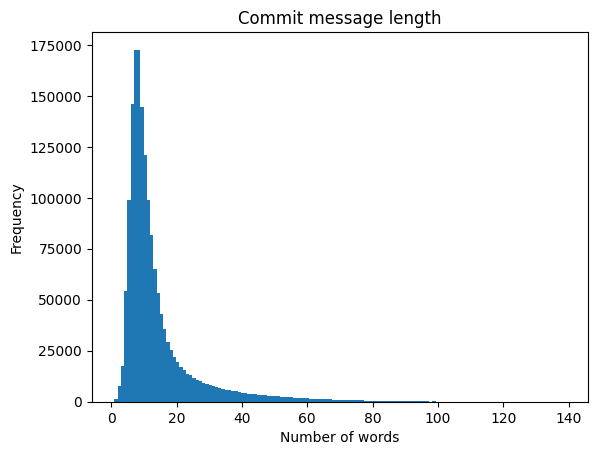

In [12]:
import matplotlib.pyplot as plt

hist = np.histogram(tokenized_messages_length, bins=np.max(tokenized_messages_length))
plt.stairs(hist[0], hist[1], fill=True)
plt.title("Commit message length")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

## Committer Statistics

In [13]:
print("Most common committers by email:")

committer_count = Counter(data["committer_email"])
committer_count.most_common(51)

Most common committers by email:


[('noreply@github.com', 96629),
 ('michele.simionato@gmail.com', 4988),
 ('crynobone@gmail.com', 3045),
 ('thomas.parrott@canonical.com', 2938),
 ('jaraco@jaraco.com', 2878),
 ('postmodern.mod3@gmail.com', 2653),
 ('github@contao.org', 2320),
 ('igor.kroitor@gmail.com', 2267),
 ('mark@mark-story.com', 2201),
 ('pedro@algarvio.me', 2112),
 ('marijnh@gmail.com', 1995),
 ('ccordoba12@gmail.com', 1990),
 ('thatch45@gmail.com', 1964),
 ('fabien.potencier@gmail.com', 1829),
 ('mjpt777@gmail.com', 1817),
 ('mitchell.hashimoto@gmail.com', 1804),
 ('taylor@laravel.com', 1713),
 ('moodler', 1688),
 ('aaron.patterson@gmail.com', 1508),
 ('ocramius@gmail.com', 1427),
 ('blickly@google.com', 1401),
 ('blactbt@live.de', 1376),
 ('nicole@saltstack.com', 1372),
 ('P.Rudiger@ed.ac.uk', 1355),
 ('ns@vivid-planet.com', 1348),
 ('jerome@leclan.ch', 1233),
 ('matijs@matijs.net', 1229),
 ('Lars.Butler@gmail.com', 1220),
 ('stgraber@ubuntu.com', 1215),
 ('fisharebest@gmail.com', 1212),
 ('none@none', 1174),


50 Committers made more than 1000 commits, 10 have committed more than 2000 times. Over 3000 commits are only achieved by the top three.

In [14]:
print("Statistics on commits per committer [by email]:")
print_statistics(list(committer_count.values()))

Statistics on commits per committer [by email]:
Mean: 9.834163137782975
Standard deviation: 238.94485349063467
Minimum: 1
25 % quartile: 1.0
Median: 2.0
75 % quartile: 5.0
Maximum: 96629



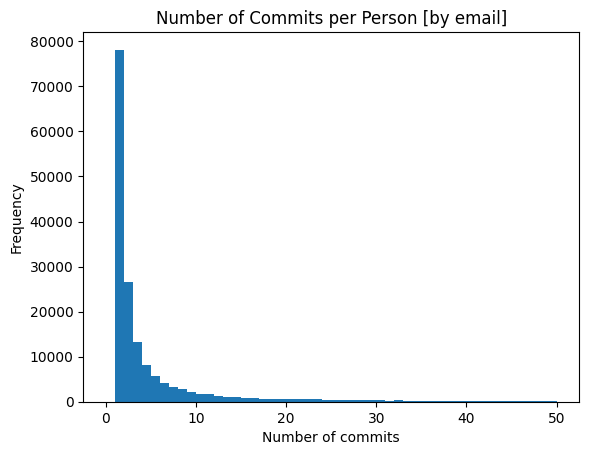

Mind that some committers made more than 50 commits. Including them would make the plot unable to perceive.


In [15]:
commiter_hist = np.histogram(list(committer_count.values()), bins=50, range=(0, 50))
plt.stairs(commiter_hist[0], commiter_hist[1], fill=True)
plt.title("Number of Commits per Person [by email]")
plt.xlabel("Number of commits")
plt.ylabel("Frequency")
plt.show()
print("Mind that some committers made more than 50 commits. Including them would make the plot unable to perceive.")

In [16]:
print("Most common committers by name:")

committer_count = Counter(data["committer_name"])
committer_count.most_common(20)

Most common committers by name:


[('GitHub', 96659),
 ('Michele Simionato', 5074),
 ('Thomas Parrott', 2940),
 ('Jason R. Coombs', 2913),
 ('Taylor Otwell', 2820),
 ('Marijn Haverbeke', 2779),
 ('Leo Feyer', 2320),
 ('Igor Kroitor', 2267),
 ('Pedro Algarvio', 2112),
 ('Fabien Potencier', 2045),
 ('crynobone', 2013),
 ('Carlos Cordoba', 1990),
 ('Thomas S Hatch', 1969),
 ('Mitchell Hashimoto', 1814),
 ('moodler', 1688),
 ('Aaron Patterson', 1516),
 ('Niko Sams', 1450),
 ('Marco Pivetta', 1427),
 ('Ben Lickly', 1401),
 ('meew0', 1376)]

The commit messages from the email noreply@github.com and committer name GitHub require further investigation.

That is why the author names and emails are taken into account in the next step.

In [17]:
print("Most common authors by name:")

committer_count = Counter(data["author_name"])
committer_count.most_common(20)

Most common authors by name:


[('Michele Simionato', 5077),
 ('Thomas Parrott', 3061),
 ('Jason R. Coombs', 2930),
 ('Igor Kroitor', 2916),
 ('Leo Feyer', 2285),
 ('Marijn Haverbeke', 2158),
 ('crynobone', 1983),
 ('Thomas S Hatch', 1981),
 ('Carlos Cordoba', 1932),
 ('Pedro Algarvio', 1921),
 ('Mitchell Hashimoto', 1764),
 ('moodler', 1688),
 ('Niko Sams', 1678),
 ('Aaron Patterson', 1459),
 ('Taylor Otwell', 1441),
 ('Fabien Potencier', 1401),
 ('meew0', 1379),
 ('postmodern', 1367),
 ('Marco Pivetta', 1362),
 ('Postmodern', 1302)]

In [18]:
print("Most common authors by email:")

committer_count = Counter(data["author_email"])
committer_count.most_common(20)

Most common authors by email:


[('michele.simionato@gmail.com', 4991),
 ('thomas.parrott@canonical.com', 3058),
 ('crynobone@gmail.com', 3054),
 ('igor.kroitor@gmail.com', 2916),
 ('jaraco@jaraco.com', 2899),
 ('postmodern.mod3@gmail.com', 2669),
 ('github@contao.org', 2285),
 ('mark@mark-story.com', 2082),
 ('thatch45@gmail.com', 1976),
 ('ccordoba12@gmail.com', 1932),
 ('pedro@algarvio.me', 1907),
 ('mjpt777@gmail.com', 1817),
 ('mitchell.hashimoto@gmail.com', 1751),
 ('moodler', 1688),
 ('ns@vivid-planet.com', 1576),
 ('marijnh@gmail.com', 1500),
 ('aaron.patterson@gmail.com', 1450),
 ('blactbt@live.de', 1379),
 ('ocramius@gmail.com', 1362),
 ('P.Rudiger@ed.ac.uk', 1356)]

The author names and emails seem to go together with the committer names and emails but the high amount of commit messages from GitHub is gone.

In [25]:
committer_investigation = data.where(data["committer_email"] == 'noreply@github.com').dropna()[['author_email', 'author_name', 'committer_email', 'committer_name']]
committer_investigation

In [26]:
committer_investigation.where(committer_investigation['author_name'] == 'ndubel').dropna()

,author_email,author_name,committer_email,committer_name
1565,38309641+ndubel@users.noreply.github.com,ndubel,noreply@github.com,GitHub
10725,38309641+ndubel@users.noreply.github.com,ndubel,noreply@github.com,GitHub
33832,38309641+ndubel@users.noreply.github.com,ndubel,noreply@github.com,GitHub
35457,38309641+ndubel@users.noreply.github.com,ndubel,noreply@github.com,GitHub
36774,38309641+ndubel@users.noreply.github.com,ndubel,noreply@github.com,GitHub
...,...,...,...,...
1635482,38309641+ndubel@users.noreply.github.com,ndubel,noreply@github.com,GitHub
1649021,38309641+ndubel@users.noreply.github.com,ndubel,noreply@github.com,GitHub
1654375,38309641+ndubel@users.noreply.github.com,ndubel,noreply@github.com,GitHub
1656054,38309641+ndubel@users.noreply.github.com,ndubel,noreply@github.com,GitHub


The author email can either be an address in the format {number}+{name}@users.noreply.github.com or a normal email address.

In the former case, the constructed email address is always the same for one user.

#### Summary of Committer Investigation

Evaluating the names of the committers shows a result where names fit to the email addresses.

Since there are always more commits done by a name that corresponds to one of the email adresses, it can be concluded that this is due to names occuring multiple times but having different email adresses.

The author names and email adresses provide information that enables to trace back different committers from the GitHub email address.

Counted by committer email address there are 50 committers having more than 1000 commit messages, counted by author email adress there are 42.

Nevertheless, further investigation is done with the author email addresses because of the higher accuracy in tracing back authors to their commit messages.

## Commit Message Frequency Statistics

In [19]:
print("Most common commit messages:")

message_count = Counter(data["message"])
message_count.most_common(20)

Most common commit messages:


[('Apply fixes from StyleCI (#<I>)', 1307),
 ('<URL>', 519),
 ('Scrutinizer Auto-Fixes\n\nThis commit consists of patches automatically generated for this project on <URL>',
  401),
 ('Bump to <I>', 396),
 ('bumped Symfony version to <I>', 306),
 ('dvc: bump to <I>', 292),
 ('version: post-release bump', 267),
 ('Apply fixes from StyleCI (#<I>)\n\n[ci skip] [skip ci]', 267),
 ('Apply suggestions from code review', 265),
 ('Bumped to <I> in preparation for next release.', 260),
 ('Bump up version\n\n[skip ci]', 240),
 ('Update version number to <I>', 217),
 ('prepare for release of <I>\n\nsvn commit r<I>', 204),
 ('(GEM) update bolt version to <I>', 199),
 ('Bump to version <I>', 188),
 ('Applied fixes from StyleCI (#<I>)', 179),
 ('Automagically formatted by Duti!\n\n<URL>', 166),
 ('Bumped version to <I>', 164),
 ('Bumping version to <I>', 139),
 ('sync with pypi version: <I>', 137)]

In [20]:
print("Statistics on occurences of commit messages:")
print_statistics(list(message_count.values()))

Statistics on occurences of commit messages:
Mean: 1.0370050439908998
Standard deviation: 1.5174083564317877
Minimum: 1
25 % quartile: 1.0
Median: 1.0
75 % quartile: 1.0
Maximum: 1307

